In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import scipy.stats as stats


from ast import literal_eval
from sklearn.metrics import cohen_kappa_score

In [ ]:
df = pd.read_csv('data/instances_2014all_workerinfo.csv')

## Do Aggregated Labels Represent Individuals Uniformly?

In [ ]:
def to_int(label):
    if label == 'Male': return 0
    elif label == 'Female': return 1
    elif label == 'Unsure': return 2
    else:
        raise ValueError
        
def worker_annotations(att):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                wtoa[worker]['i'].append(to_int(anns[index]))
                wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def get_irr(wtoa):
    # evaluate cohen's kappa
    ck = []
    for worker in wtoa:
        individual = wtoa[worker]['i']
        majority = wtoa[worker]['maj']
        score = cohen_kappa_score(individual, majority)
        if score != score:
            ck.append(1.0)
        else:
            ck.append(score)
    return ck

In [ ]:
plt.style.use('ggplot')
plt.figure(dpi=500)
plt.hist(get_irr(worker_annotations('gender')), bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='white', linewidth=1.2)
plt.ylabel('Number of Annotators')
plt.xlabel('Kappa with Majority')
plt.title('Gender')

In [ ]:
wtoa = {}
for row in df.iterrows():
    worker_ids = literal_eval(row[1]['worker_id'])
    skin_anns = literal_eval(row[1]['skin_agg'])
    maj = row[1]['skin']
    if maj != maj:
        continue
    else:
        for index, worker in enumerate(worker_ids):
            if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
            if skin_anns[index] == 'Unsure': skin_anns[index] = 7
            if maj == 'Unsure': maj = 7
            wtoa[worker]['i'].append(int(skin_anns[index]))
            wtoa[worker]['maj'].append(int(maj))

# evaluate cohen's kappa
ck = []
for worker in wtoa:
    individual = wtoa[worker]['i']
    majority = wtoa[worker]['maj']
    score = cohen_kappa_score(individual, majority)
    if score != score:
        ck.append(1.0)
    else:
        ck.append(score)

plt.style.use('ggplot')
plt.figure(dpi=500)
plt.hist(ck, bins = [0.0, 0.2, 0.4, 0.6, 0.8, 1.0], edgecolor='white', linewidth=1.2)
plt.ylabel('Number of Annotators')
plt.xlabel('Kappa with Majority')
plt.title('Skin Color')

## Do Aggregated Labels Represent Demographic Groups?

In [ ]:
worker_demographics = pickle.load(open('data/worker_demographics.pkl', 'rb'))

### Gender Annotations

In [ ]:
def worker_gender(att, gender):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['gender'] == gender: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

def worker_race(att, race):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['race'] == [race]: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    wtoa[worker]['i'].append(to_int(anns[index]))
                    wtoa[worker]['maj'].append(to_int(maj))
    return wtoa

In [ ]:
male_gender = get_irr(worker_gender('gender', 'male'))
female_gender = get_irr(worker_gender('gender', 'female'))
fvalue, pvalue = stats.f_oneway(male_gender, female_gender)
print(fvalue, pvalue)

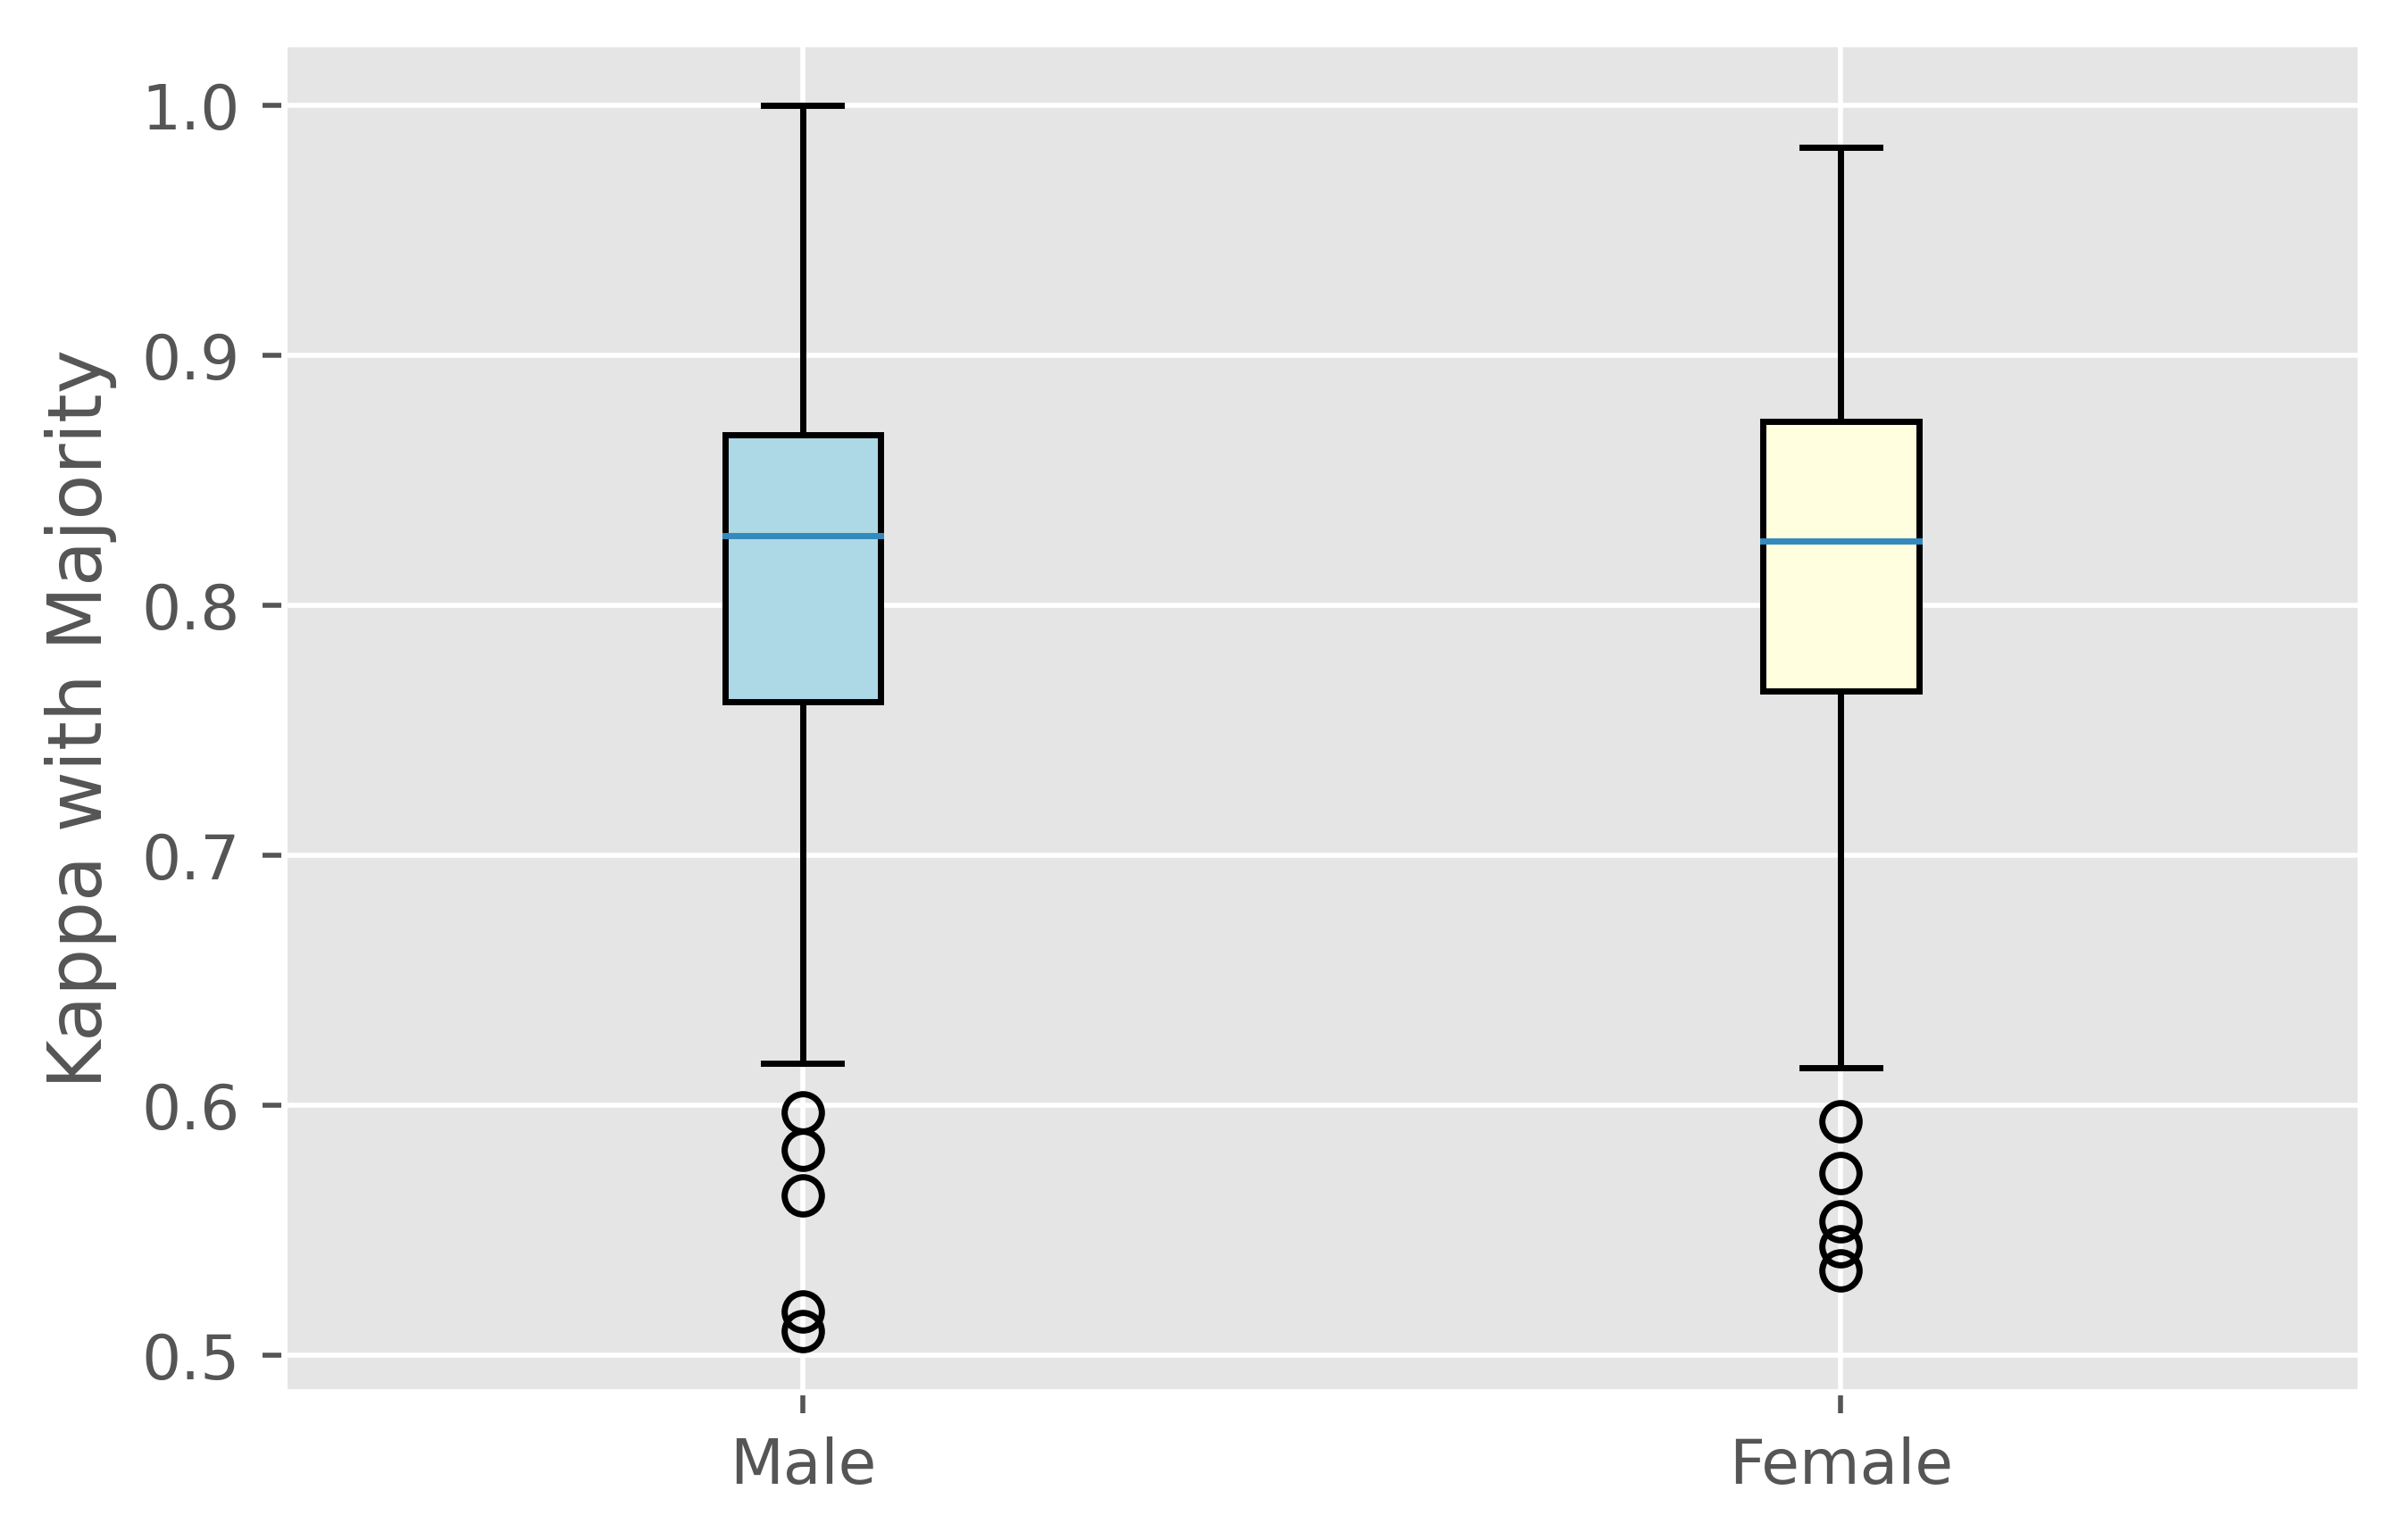

In [24]:
plt.style.use('ggplot')
plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((male_gender, female_gender), patch_artist=True, labels=['Male', 'Female'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


In [25]:
white_gender = get_irr(worker_race('gender', 'white'))
black_gender = get_irr(worker_race('gender', 'black'))
asian_gender = get_irr(worker_race('gender', 'asian'))
lat_gender = get_irr(worker_race('gender', 'latinx'))


print(np.mean(white_gender))
print(np.mean(black_gender))
print(np.mean(asian_gender))
print(np.mean(lat_gender))

0.8150354696560811
0.8070261204976776
0.8178932716600452
0.8130069696621246


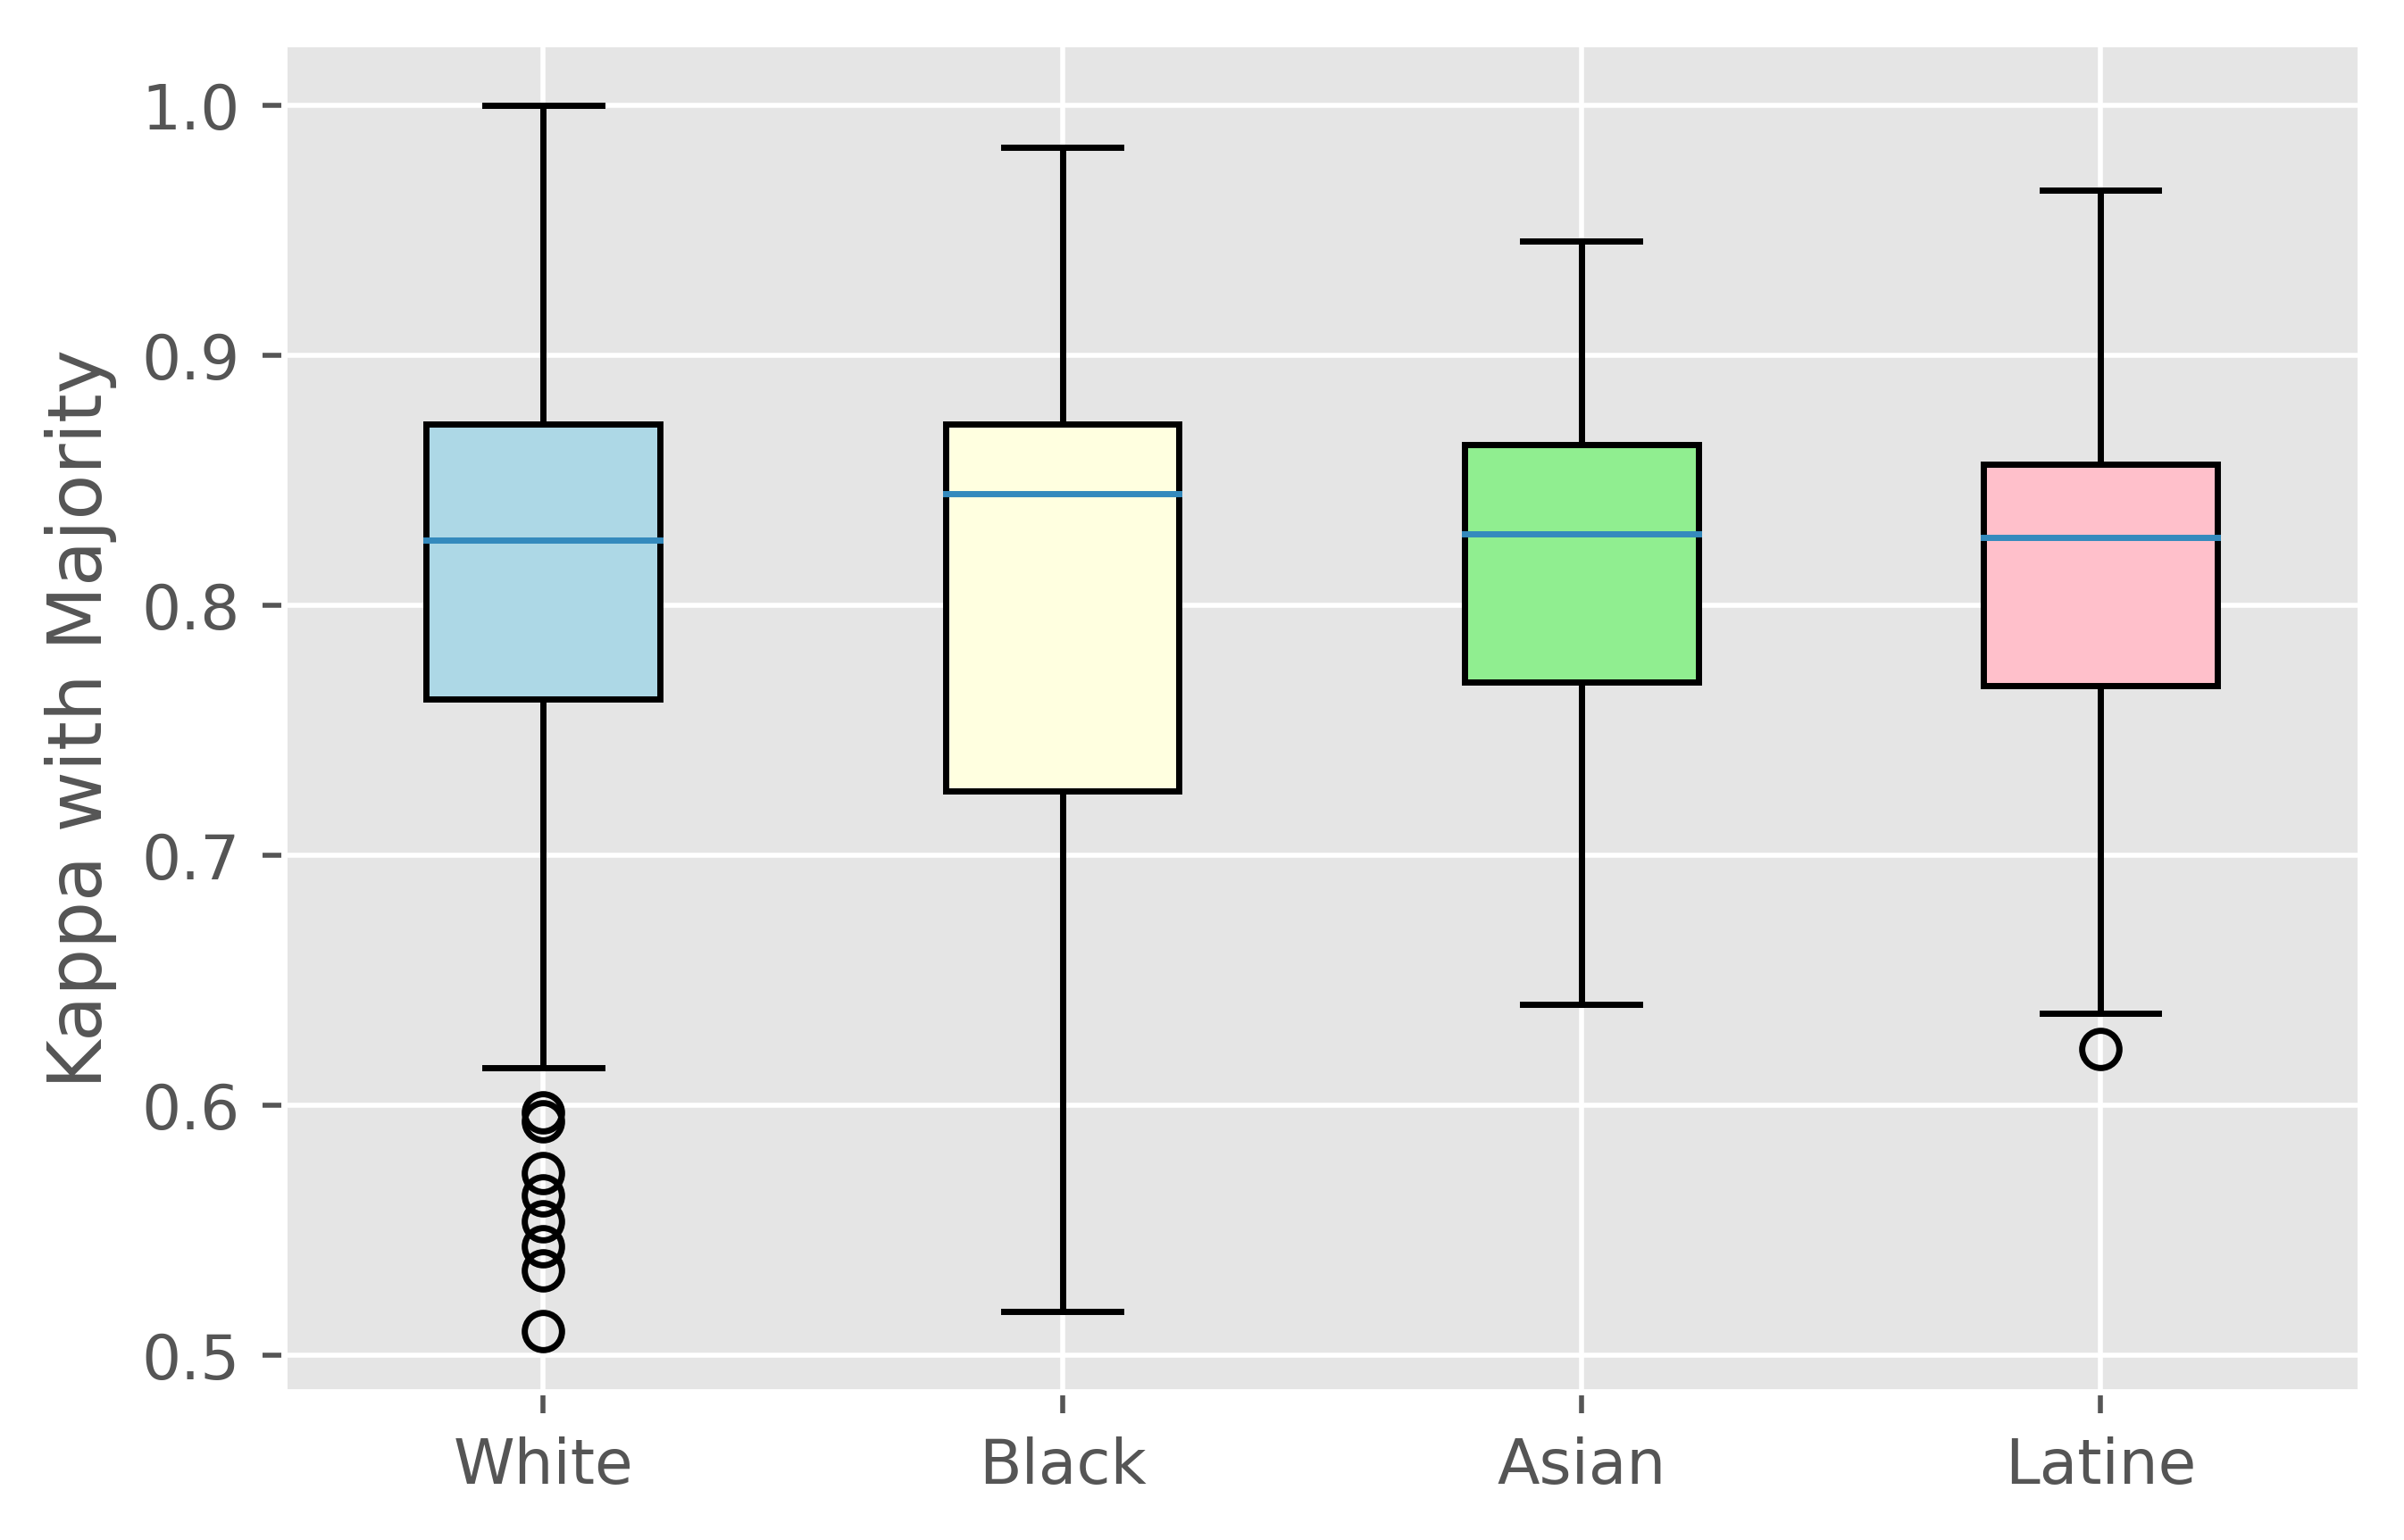

In [26]:
plt.style.use('ggplot')
plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((white_gender, black_gender, asian_gender, lat_gender), patch_artist=True, labels=['White', 'Black', 'Asian', 'Latine'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow', 'lightgreen', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)

In [34]:
fvalue, pvalue = stats.f_oneway(white_gender, black_gender, asian_gender, lat_gender)
print(fvalue, pvalue)

0.09226480885842787 0.9642883637897008


### Skin Color Annotations

In [44]:
def worker_gender(att, gender):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['gender'] == gender: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    if anns[index] == 'Unsure': anns[index] = 7
                    if maj == 'Unsure': maj = 7
                    wtoa[worker]['i'].append(int(anns[index]))
                    wtoa[worker]['maj'].append(int(maj))

    return wtoa

def worker_race(att, race):
    wtoa = {}
    for row in df.iterrows():
        worker_ids = literal_eval(row[1]['worker_id'])
        anns = literal_eval(row[1]['{}_agg'.format(att)])
        maj = row[1][att]
        if maj != maj:
            continue
        else:
            for index, worker in enumerate(worker_ids):
                if worker in worker_demographics and worker_demographics[worker]['race'] == [race]: 
                    if worker not in wtoa: wtoa[worker] = {'i': [], 'maj': []}
                    if anns[index] == 'Unsure': anns[index] = 7
                    if maj == 'Unsure': maj = 7
                    wtoa[worker]['i'].append(int(anns[index]))
                    wtoa[worker]['maj'].append(int(maj))
    return wtoa

In [40]:
male_race = get_irr(worker_gender('skin', 'male'))
female_race = get_irr(worker_gender('skin', 'female'))
fvalue, pvalue = stats.f_oneway(male_race, female_race)
print(fvalue, pvalue)

0.007779767210247183 0.9297561199081728


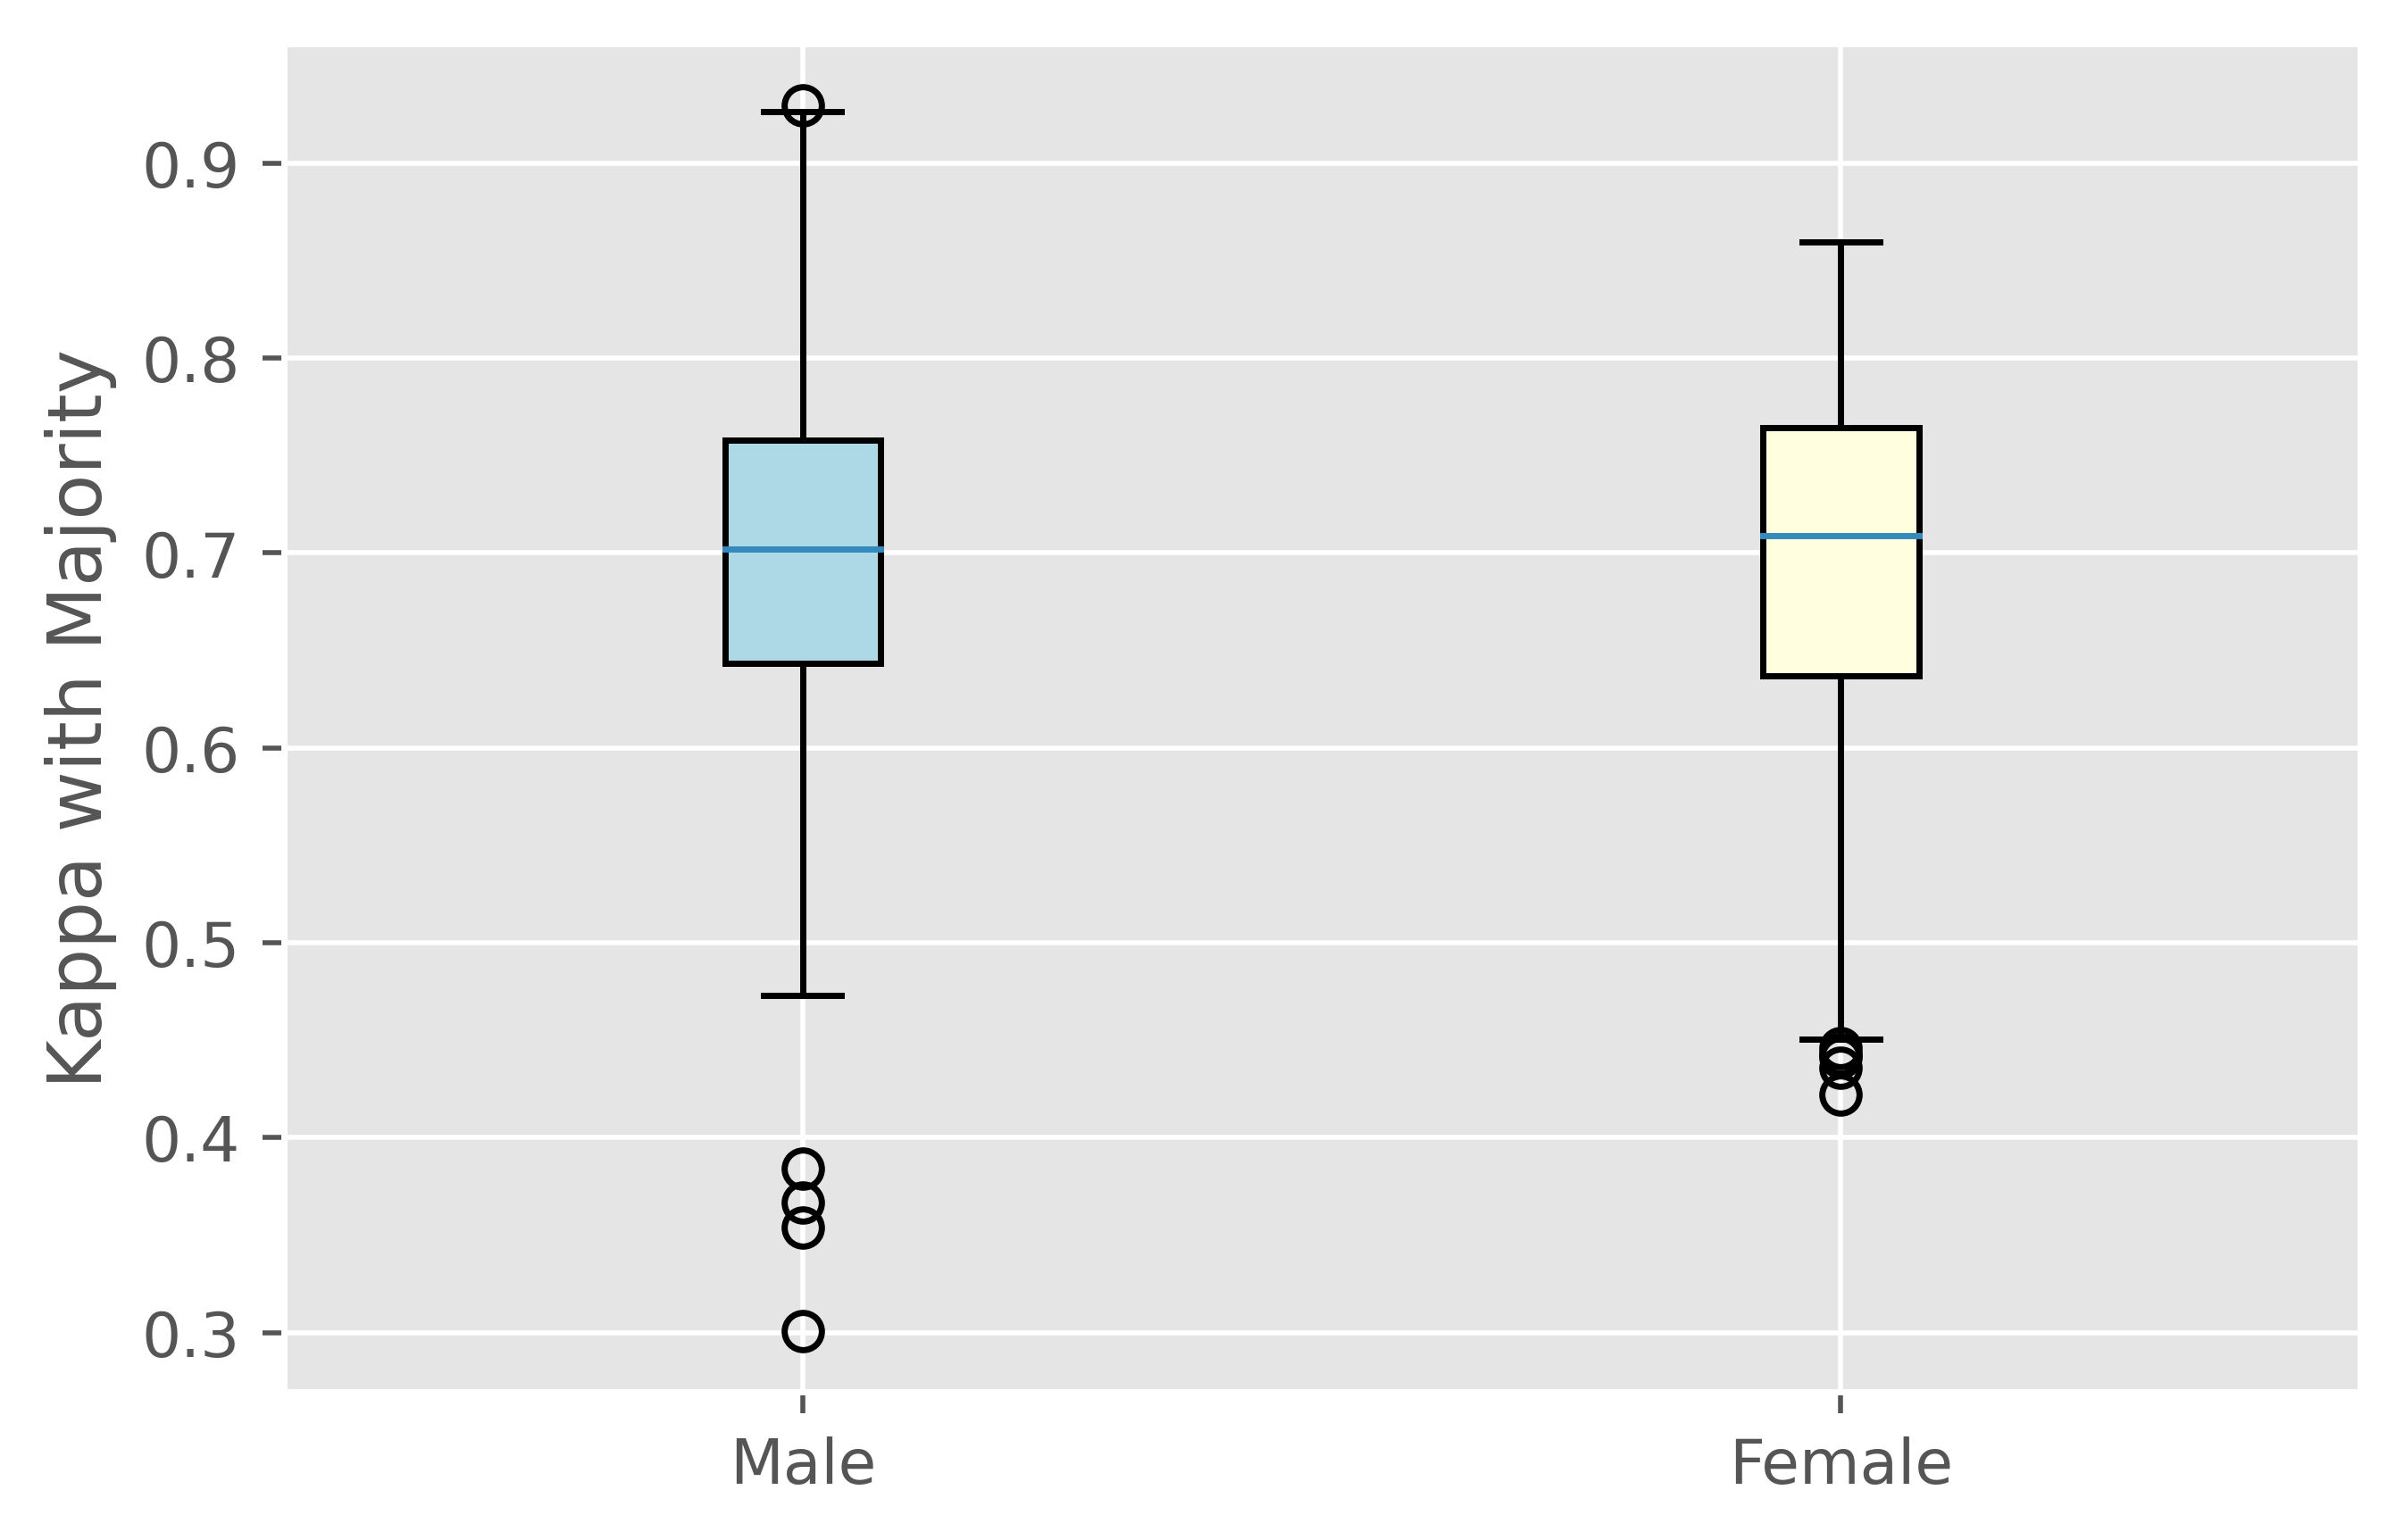

In [41]:
plt.style.use('ggplot')
plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((male_race, female_race), patch_artist=True, labels=['Male', 'Female'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)


In [45]:
white_gender = get_irr(worker_race('skin', 'white'))
black_gender = get_irr(worker_race('skin', 'black'))
asian_gender = get_irr(worker_race('skin', 'asian'))
lat_gender = get_irr(worker_race('skin', 'latinx'))


print(np.mean(white_gender))
print(np.mean(black_gender))
print(np.mean(asian_gender))
print(np.mean(lat_gender))
fvalue, pvalue = stats.f_oneway(white_gender, black_gender, asian_gender, lat_gender)
print(fvalue, pvalue)

0.6895020996151872
0.6869772457554724
0.7042300619318749
0.7141050395871763
0.6361897959139163 0.5920378783348841


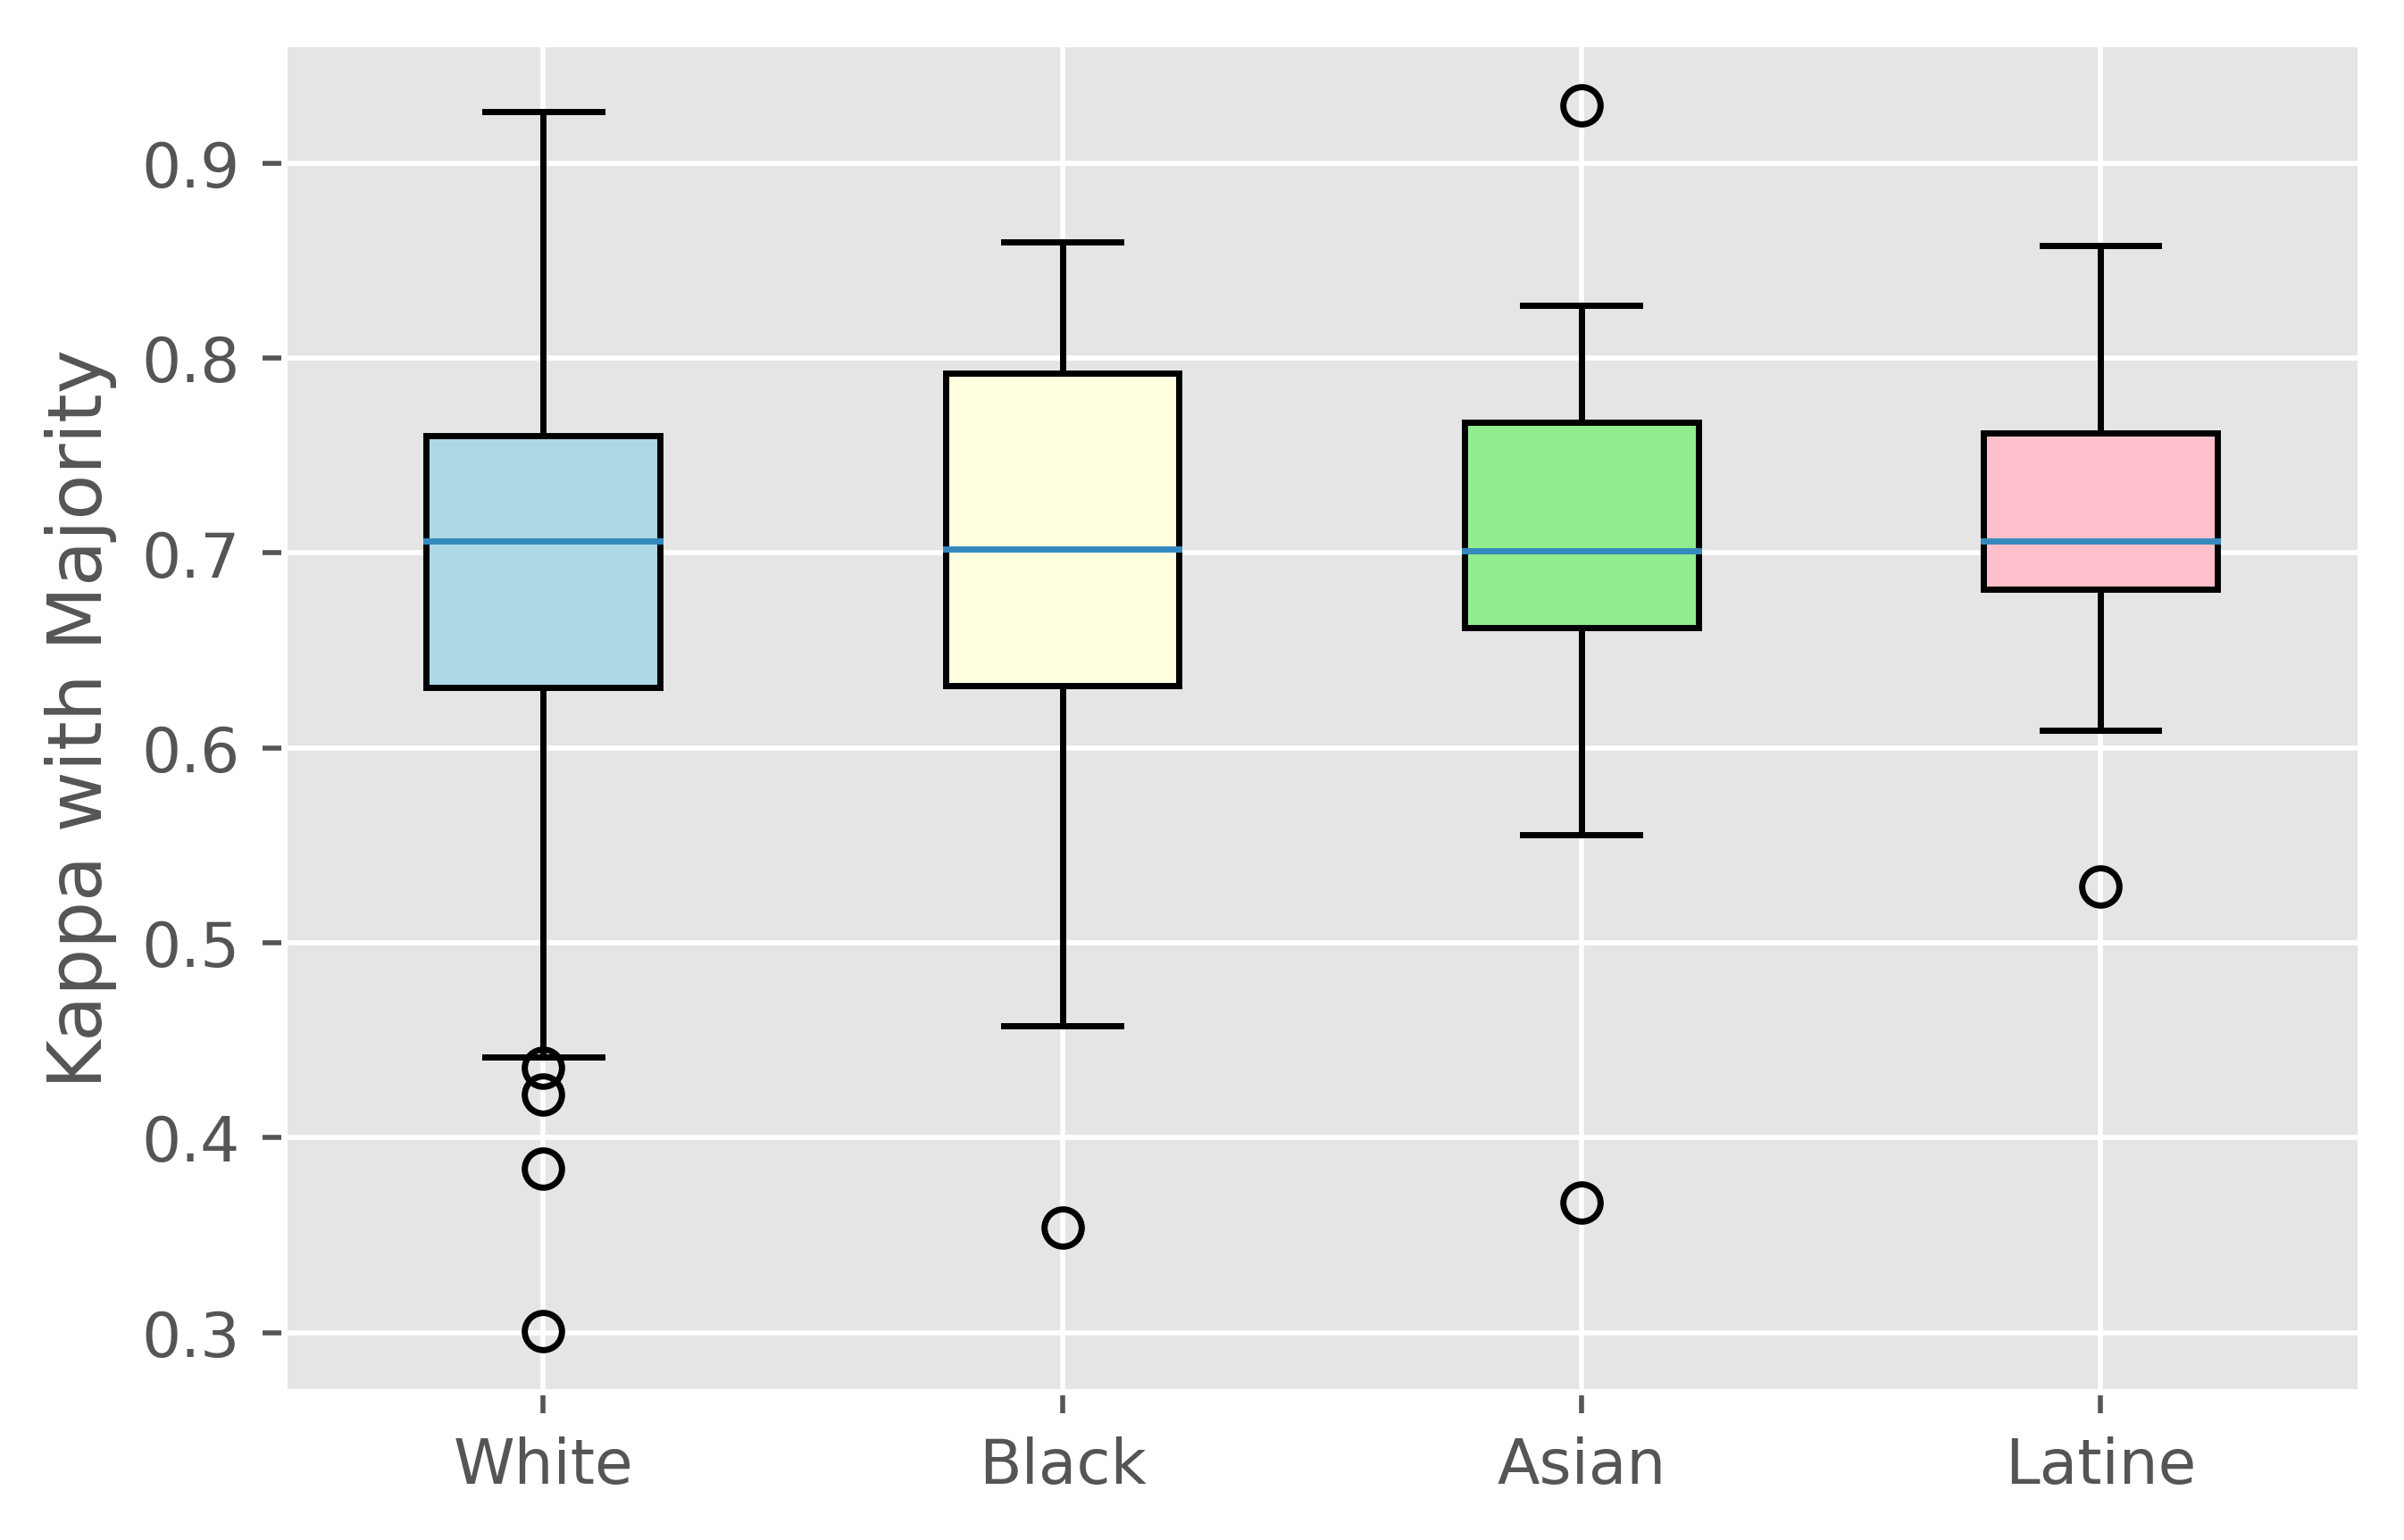

In [46]:
plt.style.use('ggplot')
plt.figure(dpi=500)
# fig, ax = plt.figure()
bplot = plt.boxplot((white_gender, black_gender, asian_gender, lat_gender), patch_artist=True, labels=['White', 'Black', 'Asian', 'Latine'], vert=True)
# plt.xticks(ticks=[1, 2], labels= ['Male', 'Female'])
plt.ylabel('Kappa with Majority')

colors = ['lightblue', 'lightyellow', 'lightgreen', 'pink']
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)